<a href="https://colab.research.google.com/github/cristinarainich/Sternberg_analysis/blob/main/Models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [116]:
import pandas as pd
import numpy as np
from pathlib import Path
import pylab as pl
import seaborn as sns
import re
from scipy import stats
import scipy.io
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [ ]:
sns.set()

In [ ]:
!pip install -q pymer4

     |████████████████████████████████| 59 kB 2.5 MB/s 


In [ ]:
from pymer4.models import Lmer

In [ ]:
!pip install -q statsmodels

In [ ]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
# Install R and Rpy2
!apt-get install r-base
!pip install -q rpy2

# Install LMER packages (THIS TAKES ABOUT 3~5 minutes)
packnames = ('lme4', 'lmerTest', 'emmeans', "geepack")
from rpy2.robjects.packages import importr
from rpy2.robjects.vectors import StrVector
utils = importr("utils")
utils.chooseCRANmirror(ind=1)
utils.install_packages(StrVector(packnames))

Reading package lists... Done
Building dependency tree       
Reading state information... Done
r-base is already the newest version (4.2.0-1.1804.0).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.


R[write to console]: Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

R[write to console]: also installing the dependencies ‘minqa’, ‘nloptr’, ‘Rcpp’, ‘RcppEigen’, ‘numDeriv’, ‘estimability’, ‘mvtnorm’, ‘xtable’


R[write to console]: trying URL 'https://cloud.r-project.org/src/contrib/minqa_1.2.4.tar.gz'

R[write to console]: Content type 'application/x-gzip'
R[write to console]:  length 53548 bytes (52 KB)

R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =


<rpy2.rinterface_lib.sexp.NULLType object at 0x7f5b56642a50> [RTYPES.NILSXP]

In [ ]:
%load_ext rpy2.ipython

In [ ]:
%%R 
library(lme4)
library(lmerTest)

R[write to console]: Loading required package: Matrix

R[write to console]: 
Attaching package: ‘lmerTest’


R[write to console]: The following object is masked from ‘package:lme4’:

    lmer


R[write to console]: The following object is masked from ‘package:stats’:

    step




## Uploading data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [112]:
working_path = Path('/content/drive/MyDrive/CoganLab')

In [ ]:
ieeg = pd.read_csv(
    working_path.joinpath('ieeg_no_outliers.csv'),
    index_col=None
)

In [115]:
ieeg_extended = pd.read_csv(
    working_path.joinpath('ieeg_no_outliers_moresubjects.csv'),
    index_col=None
)

In [ ]:
eeg = pd.read_csv(
    working_path.joinpath('eeg_no_outliers.csv'),
    index_col=None
)

In [118]:
new_subject = scipy.io.loadmat(
    working_path.joinpath('D72_Block_1_TrialData.mat')
    )

## EEG dataset

In [ ]:
eeg_data = eeg[[
                'Trial', 'Subject', 'Block',
                'ProbeType', 'stdRT', 'ResponseCorrect',
                'Position', 'Length', 'Lex', 'Phono'
]]

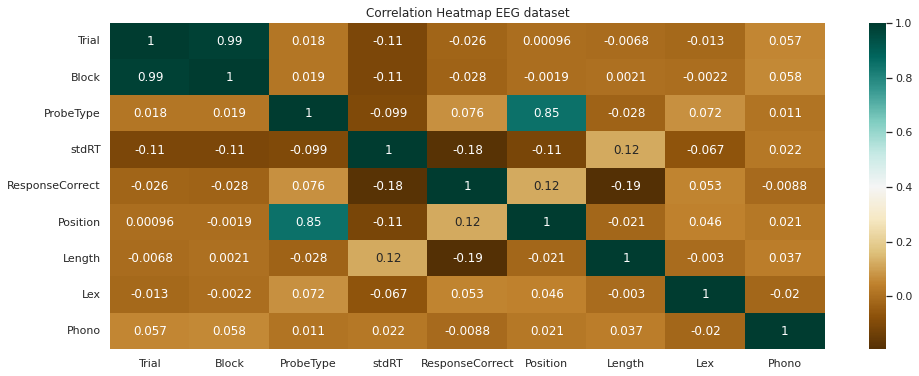

In [ ]:
pl.figure(figsize=(16, 6))
map = sns.heatmap(eeg_data.corr(), annot=True, cmap = 'BrBG')
map.set_title('Correlation Heatmap EEG dataset');

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


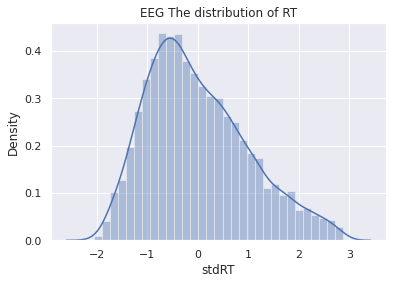

In [ ]:
sns.distplot(eeg_data.stdRT)
pl.title('EEG The distribution of RT');

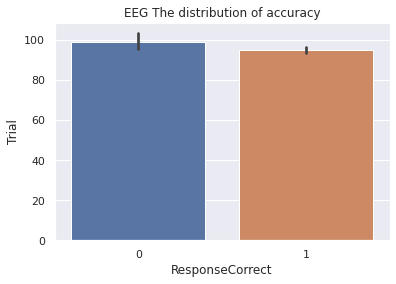

In [ ]:
sns.barplot(
    x = 'ResponseCorrect', y = 'Trial',
    data = eeg_data
    )
pl.title('EEG The distribution of accuracy');

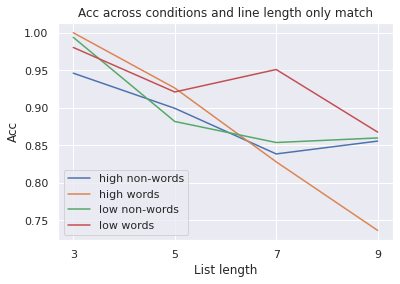

In [85]:
pl.figure()
subset = eeg[eeg['ProbeType'] == 2].groupby(['ProbeCategory', 'Length'])[['ResponseCorrect']].mean().reset_index()
for i in subset.ProbeCategory.unique():
  x = subset[subset['ProbeCategory'] == i]
  pl.plot(x.Length, x.ResponseCorrect)
pl.xticks(x.Length)
pl.xlabel('List length')
pl.ylabel('Acc')
pl.legend(subset.ProbeCategory.unique())
pl.title('Acc across conditions and line length only match');

In [104]:
xx = eeg[(eeg['ProbeType'] == 2) & (eeg['Length'] == 9) & (eeg['ProbeCategory'] == 'low words')]
xx.groupby(['Subject'])[['ResponseCorrect']].mean()

,ResponseCorrect
Subject,
E10,0.600
E11,1.000
E12,0.600
E13,1.000
E15,0.800
E16,1.000
E17,1.000
E18,0.800
E2,0.800


**Models**

Full model with all IVs: lex, phono, length, probe, position.

In [47]:
model_3 = Lmer(
    'ResponseCorrect ~ Lex + Phono + Length + Lex*Phono + Lex*Length + Phono*Length + Lex*Phono*Length + (1|Subject)', 
    data=eeg_data
    )

In [48]:
model_3.fit()

Formula: ResponseCorrect~Lex+Phono+Length+Lex*Phono+Lex*Length+Phono*Length+Lex*Phono*Length+(1|Subject)

Family: gaussian	 Inference: parametric

Number of observations: 5334	 Groups: {'Subject': 29.0}

Log-likelihood: -1572.609 	 AIC: 3145.218

Random effects:

                 Name    Var    Std
Subject   (Intercept)  0.001  0.038
Residual               0.104  0.322

No random effect correlations specified

Fixed effects:



,Estimate,2.5_ci,97.5_ci,SE,DF,T-stat,P-val,Sig
(Intercept),1.009,0.960,1.059,0.025,1772.892,39.921,0.000,***
Lex,0.083,0.016,0.150,0.034,5299.214,2.444,0.015,*
Phono,0.020,-0.050,0.091,0.036,5300.981,0.568,0.570,
Length,-0.025,-0.033,-0.018,0.004,5300.231,-6.678,0.000,***
Lex:Phono,-0.060,-0.159,0.039,0.051,5299.982,-1.181,0.238,
Lex:Length,-0.008,-0.018,0.003,0.005,5299.286,-1.469,0.142,
Phono:Length,-0.003,-0.014,0.008,0.006,5301.679,-0.566,0.572,
Lex:Phono:Length,0.009,-0.006,0.025,0.008,5299.852,1.176,0.240,


In [49]:
model_3_upd = Lmer(
    'ResponseCorrect ~ Lex + Length + (1|Subject)', 
    data=eeg_data
    )
model_3_upd.fit()

Formula: ResponseCorrect~Lex+Length+(1|Subject)

Family: gaussian	 Inference: parametric

Number of observations: 5334	 Groups: {'Subject': 29.0}

Log-likelihood: -1553.750 	 AIC: 3107.501

Random effects:

                 Name    Var    Std
Subject   (Intercept)  0.001  0.038
Residual               0.104  0.322

No random effect correlations specified

Fixed effects:



,Estimate,2.5_ci,97.5_ci,SE,DF,T-stat,P-val,Sig
(Intercept),1.029,1.000,1.059,0.015,300.297,68.201,0.0,***
Lex,0.034,0.017,0.052,0.009,5303.481,3.899,0.0,***
Length,-0.029,-0.033,-0.025,0.002,5303.469,-14.545,0.0,***


In [55]:
model_4 = Lmer(
    'ResponseCorrect ~ Lex + Phono + Length + ProbeType + Lex*Phono + Lex*Length + Phono*Length + ProbeType*Lex + ProbeType*Phono + ProbeType*Length + Lex*Phono*Length + Lex*Phono*ProbeType + Phono*Length*ProbeType + Lex*Length*ProbeType + Lex*Phono*Length*ProbeType + (1|Subject)', 
    data=eeg_data
    )
model_4.fit()

Formula: ResponseCorrect~Lex+Phono+Length+ProbeType+Lex*Phono+Lex*Length+Phono*Length+ProbeType*Lex+ProbeType*Phono+ProbeType*Length+Lex*Phono*Length+Lex*Phono*ProbeType+Phono*Length*ProbeType+Lex*Length*ProbeType+Lex*Phono*Length*ProbeType+(1|Subject)

Family: gaussian	 Inference: parametric

Number of observations: 5334	 Groups: {'Subject': 29.0}

Log-likelihood: -1558.639 	 AIC: 3117.278

Random effects:

                 Name    Var    Std
Subject   (Intercept)  0.001  0.038
Residual               0.102  0.320

No random effect correlations specified

Fixed effects:



,Estimate,2.5_ci,97.5_ci,SE,DF,T-stat,P-val,Sig
(Intercept),1.087,0.940,1.234,0.075,5263.407,14.496,0.000,***
Lex,-0.128,-0.336,0.080,0.106,5295.322,-1.204,0.229,
Phono,-0.045,-0.268,0.178,0.114,5295.041,-0.394,0.694,
Length,-0.053,-0.076,-0.030,0.012,5292.822,-4.485,0.000,***
ProbeType,-0.051,-0.146,0.044,0.048,5292.527,-1.055,0.291,
Lex:Phono,0.204,-0.112,0.520,0.161,5296.754,1.263,0.207,
Lex:Length,0.052,0.019,0.084,0.017,5293.682,3.105,0.002,**
Phono:Length,0.004,-0.031,0.039,0.018,5293.950,0.221,0.825,
Lex:ProbeType,0.142,0.009,0.275,0.068,5294.918,2.098,0.036,*
Phono:ProbeType,0.042,-0.098,0.182,0.072,5293.420,0.585,0.559,


In [ ]:
#model_3.post_hoc(marginal_vars='Subject')

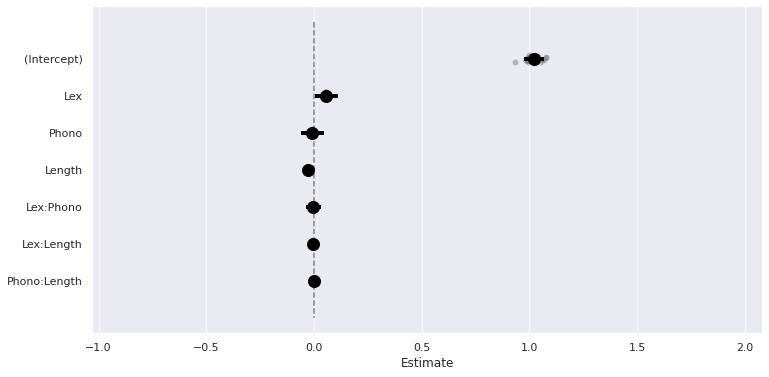

In [42]:
model_3.plot_summary();

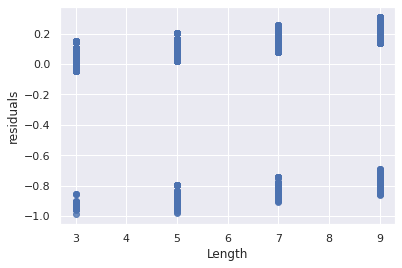

In [46]:
sns.regplot(x= 'Length',
y= 'residuals',
data= model_3.data,
fit_reg= False
);

In [110]:
model_pos = Lmer(
    'ResponseCorrect ~ Phono + Position + Lex + Length + (1|Subject)',
    data = eeg_data
)
model_pos.fit()

Formula: ResponseCorrect~Phono+Position+Lex+Length+(1|Subject)

Family: gaussian	 Inference: parametric

Number of observations: 5334	 Groups: {'Subject': 29.0}

Log-likelihood: -1524.921 	 AIC: 3049.843

Random effects:

                 Name    Var    Std
Subject   (Intercept)  0.001  0.038
Residual               0.102  0.320

No random effect correlations specified

Fixed effects:



,Estimate,2.5_ci,97.5_ci,SE,DF,T-stat,P-val,Sig
(Intercept),0.997,0.966,1.029,0.016,364.284,62.285,0.000,***
Phono,-0.003,-0.020,0.015,0.009,5302.038,-0.294,0.769,
Position,0.034,0.026,0.041,0.004,5306.845,8.663,0.000,***
Lex,0.031,0.014,0.048,0.009,5301.551,3.516,0.000,***
Length,-0.028,-0.032,-0.024,0.002,5301.457,-14.442,0.000,***


In [111]:
model_pos = Lmer(
    'RespCorrect ~ Phono + Position + Lex + Length + (1|Subject)',
    data = ieeg_data
)
model_pos.fit()

Formula: RespCorrect~Phono+Position+Lex+Length+(1|Subject)

Family: gaussian	 Inference: parametric

Number of observations: 3343	 Groups: {'Subject': 22.0}

Log-likelihood: -1127.484 	 AIC: 2254.969

Random effects:

                 Name    Var    Std
Subject   (Intercept)  0.001  0.034
Residual               0.113  0.336

No random effect correlations specified

Fixed effects:



,Estimate,2.5_ci,97.5_ci,SE,DF,T-stat,P-val,Sig
(Intercept),1.005,0.964,1.047,0.021,496.319,47.840,0.000,***
Phono,0.007,-0.016,0.030,0.012,3330.604,0.587,0.557,
Position,0.027,0.018,0.037,0.005,3335.205,5.504,0.000,***
Lex,0.019,-0.004,0.042,0.012,3317.732,1.628,0.104,
Length,-0.031,-0.036,-0.026,0.003,3318.179,-11.812,0.000,***


**Model with Match vs. mismatch**

In [57]:
match = eeg_data[eeg_data['ProbeType'] == 2]
mismatch = eeg_data[eeg_data['ProbeType'] == 1]

In [58]:
# model for MATCH
model_match = Lmer(
    'ResponseCorrect ~ Lex + Phono + Length + Lex*Phono + Phono*Length + Lex*Length + Lex*Phono*Length + (1|Subject)',
    data=match
)
model_match.fit()

Formula: ResponseCorrect~Lex+Phono+Length+Lex*Phono+Phono*Length+Lex*Length+Lex*Phono*Length+(1|Subject)

Family: gaussian	 Inference: parametric

Number of observations: 2713	 Groups: {'Subject': 29.0}

Log-likelihood: -528.742 	 AIC: 1057.484

Random effects:

                 Name    Var    Std
Subject   (Intercept)  0.003  0.056
Residual               0.083  0.289

No random effect correlations specified

Fixed effects:



,Estimate,2.5_ci,97.5_ci,SE,DF,T-stat,P-val,Sig
(Intercept),0.986,0.920,1.052,0.034,1233.157,29.156,0.000,***
Lex,0.158,0.072,0.244,0.044,2678.360,3.602,0.000,***
Phono,0.041,-0.048,0.130,0.045,2677.237,0.901,0.368,
Length,-0.017,-0.026,-0.007,0.005,2679.214,-3.337,0.001,***
Lex:Phono,-0.166,-0.290,-0.041,0.064,2677.918,-2.609,0.009,**
Phono:Length,-0.005,-0.019,0.009,0.007,2677.539,-0.674,0.500,
Lex:Length,-0.028,-0.042,-0.015,0.007,2678.116,-4.102,0.000,***
Lex:Phono:Length,0.035,0.015,0.055,0.010,2677.405,3.506,0.000,***


In [59]:
# model for MISMATCH
model_mis = Lmer(
    'ResponseCorrect ~ Lex + Phono + Length + Lex*Phono + Phono*Length + Lex*Length + Lex*Phono*Length + (1|Subject)',
    data=mismatch
)
model_mis.fit()

Formula: ResponseCorrect~Lex+Phono+Length+Lex*Phono+Phono*Length+Lex*Length+Lex*Phono*Length+(1|Subject)

Family: gaussian	 Inference: parametric

Number of observations: 2621	 Groups: {'Subject': 29.0}

Log-likelihood: -942.322 	 AIC: 1884.644

Random effects:

                 Name    Var    Std
Subject   (Intercept)  0.006  0.079
Residual               0.116  0.340

No random effect correlations specified

Fixed effects:



,Estimate,2.5_ci,97.5_ci,SE,DF,T-stat,P-val,Sig
(Intercept),1.032,0.958,1.106,0.038,698.496,27.298,0.000,***
Lex,0.016,-0.082,0.115,0.050,2587.954,0.322,0.747,
Phono,0.004,-0.103,0.110,0.054,2589.062,0.069,0.945,
Length,-0.034,-0.045,-0.023,0.006,2586.367,-6.201,0.000,***
Lex:Phono,0.019,-0.133,0.170,0.077,2589.333,0.239,0.811,
Phono:Length,-0.002,-0.018,0.015,0.008,2588.675,-0.178,0.859,
Lex:Length,0.012,-0.004,0.027,0.008,2587.082,1.460,0.144,
Lex:Phono:Length,-0.014,-0.038,0.009,0.012,2588.131,-1.191,0.234,


**Model with Words vs. Non-words**

In [60]:
words = eeg_data[eeg_data['Lex'] == 1]
nonwords = eeg_data[eeg_data['Lex'] == 0]

In [65]:
# model for WORDS
model_words = Lmer(
    'ResponseCorrect ~ ProbeType + Phono + Length + ProbeType*Phono + Phono*Length + ProbeType*Length + ProbeType*Phono*Length + (1|Subject)',
    data=words
)
model_words.fit()

Formula: ResponseCorrect~ProbeType+Phono+Length+ProbeType*Phono+Phono*Length+ProbeType*Length+ProbeType*Phono*Length+(1|Subject)

Family: gaussian	 Inference: parametric

Number of observations: 2683	 Groups: {'Subject': 29.0}

Log-likelihood: -598.194 	 AIC: 1196.388

Random effects:

                 Name    Var    Std
Subject   (Intercept)  0.001  0.033
Residual               0.089  0.298

No random effect correlations specified

Fixed effects:



,Estimate,2.5_ci,97.5_ci,SE,DF,T-stat,P-val,Sig
(Intercept),0.959,0.821,1.098,0.071,2666.908,13.559,0.000,***
ProbeType,0.091,0.004,0.177,0.044,2658.371,2.049,0.041,*
Phono,0.162,-0.047,0.371,0.107,2652.736,1.517,0.130,
Length,-0.001,-0.023,0.021,0.011,2655.338,-0.085,0.932,
ProbeType:Phono,-0.141,-0.272,-0.011,0.067,2652.390,-2.123,0.034,*
Phono:Length,-0.060,-0.092,-0.028,0.016,2650.648,-3.658,0.000,***
ProbeType:Length,-0.022,-0.036,-0.008,0.007,2655.966,-3.107,0.002,**
ProbeType:Phono:Length,0.045,0.025,0.065,0.010,2650.027,4.337,0.000,***


In [66]:
# model for NONWORDS
model_nonwords = Lmer(
    'ResponseCorrect ~ ProbeType + Phono + Length + ProbeType*Phono + Phono*Length + ProbeType*Length + ProbeType*Phono*Length + (1|Subject)',
    data=nonwords
)
model_nonwords.fit()

Formula: ResponseCorrect~ProbeType+Phono+Length+ProbeType*Phono+Phono*Length+ProbeType*Length+ProbeType*Phono*Length+(1|Subject)

Family: gaussian	 Inference: parametric

Number of observations: 2651	 Groups: {'Subject': 29.0}

Log-likelihood: -937.992 	 AIC: 1875.984

Random effects:

                 Name    Var    Std
Subject   (Intercept)  0.002  0.050
Residual               0.115  0.339

No random effect correlations specified

Fixed effects:



,Estimate,2.5_ci,97.5_ci,SE,DF,T-stat,P-val,Sig
(Intercept),1.084,0.927,1.240,0.080,2616.176,13.590,0.000,***
ProbeType,-0.049,-0.150,0.051,0.051,2618.134,-0.959,0.338,
Phono,-0.043,-0.280,0.194,0.121,2621.123,-0.356,0.722,
Length,-0.052,-0.077,-0.028,0.012,2618.473,-4.205,0.000,***
ProbeType:Phono,0.040,-0.109,0.189,0.076,2619.198,0.532,0.595,
Phono:Length,0.004,-0.033,0.041,0.019,2619.830,0.204,0.838,
ProbeType:Length,0.018,0.002,0.034,0.008,2618.857,2.251,0.024,*
ProbeType:Phono:Length,-0.004,-0.028,0.019,0.012,2617.971,-0.361,0.718,


**Model with H vs L**

In [67]:
low = eeg_data[eeg_data['Phono'] == 1]
high = eeg_data[eeg_data['Phono'] == 0]

In [68]:
# model for HIGH
model_high = Lmer(
    'ResponseCorrect ~ ProbeType + Lex + Length + ProbeType*Lex + Lex*Length + ProbeType*Length + ProbeType*Lex*Length + (1|Subject)',
    data=high
)
model_high.fit()

Formula: ResponseCorrect~ProbeType+Lex+Length+ProbeType*Lex+Lex*Length+ProbeType*Length+ProbeType*Lex*Length+(1|Subject)

Family: gaussian	 Inference: parametric

Number of observations: 2741	 Groups: {'Subject': 29.0}

Log-likelihood: -776.715 	 AIC: 1553.429

Random effects:

                 Name    Var    Std
Subject   (Intercept)  0.001  0.032
Residual               0.100  0.317

No random effect correlations specified

Fixed effects:



,Estimate,2.5_ci,97.5_ci,SE,DF,T-stat,P-val,Sig
(Intercept),1.089,0.944,1.235,0.074,2729.166,14.678,0.000,***
ProbeType,-0.053,-0.147,0.041,0.048,2709.449,-1.098,0.272,
Lex,-0.127,-0.334,0.079,0.105,2714.272,-1.208,0.227,
Length,-0.053,-0.076,-0.030,0.012,2709.918,-4.557,0.000,***
ProbeType:Lex,0.142,0.010,0.273,0.067,2713.585,2.107,0.035,*
Lex:Length,0.052,0.019,0.084,0.017,2711.461,3.125,0.002,**
ProbeType:Length,0.018,0.004,0.033,0.007,2710.478,2.468,0.014,*
ProbeType:Lex:Length,-0.040,-0.061,-0.019,0.011,2710.942,-3.789,0.000,***


In [69]:
# model for LOW
model_low = Lmer(
    'ResponseCorrect ~ ProbeType + Lex + Length + ProbeType*Lex + Lex*Length + ProbeType*Length + ProbeType*Lex*Length + (1|Subject)',
    data=low
)
model_low.fit()

Formula: ResponseCorrect~ProbeType+Lex+Length+ProbeType*Lex+Lex*Length+ProbeType*Length+ProbeType*Lex*Length+(1|Subject)

Family: gaussian	 Inference: parametric

Number of observations: 2593	 Groups: {'Subject': 29.0}

Log-likelihood: -788.902 	 AIC: 1577.803

Random effects:

                 Name    Var    Std
Subject   (Intercept)  0.002  0.040
Residual               0.104  0.323

No random effect correlations specified

Fixed effects:



,Estimate,2.5_ci,97.5_ci,SE,DF,T-stat,P-val,Sig
(Intercept),1.041,0.870,1.212,0.087,2581.778,11.949,0.000,***
ProbeType,-0.009,-0.113,0.096,0.053,2565.357,-0.165,0.869,
Lex,0.076,-0.164,0.317,0.123,2562.859,0.623,0.534,
Length,-0.049,-0.075,-0.022,0.013,2568.165,-3.619,0.000,***
ProbeType:Lex,-0.040,-0.189,0.109,0.076,2562.049,-0.526,0.599,
Lex:Length,-0.012,-0.049,0.025,0.019,2561.913,-0.646,0.518,
ProbeType:Length,0.014,-0.003,0.030,0.008,2566.633,1.655,0.098,.
ProbeType:Lex:Length,0.009,-0.014,0.032,0.012,2561.253,0.787,0.431,


## iEEG dataset short version

In [70]:
ieeg_data = ieeg[[
                'Trial', 'Subject', 'block',
                'ProbeType', 'stdRT', 'RespCorrect',
                'Position', 'Length', 'Lex', 'Phono'  
]]

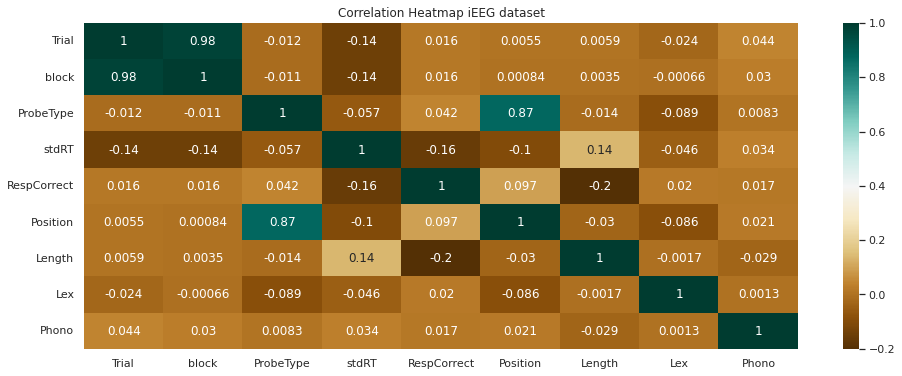

In [71]:
pl.figure(figsize=(16, 6))
map = sns.heatmap(ieeg_data.corr(), annot=True, cmap = 'BrBG')
map.set_title('Correlation Heatmap iEEG dataset');

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


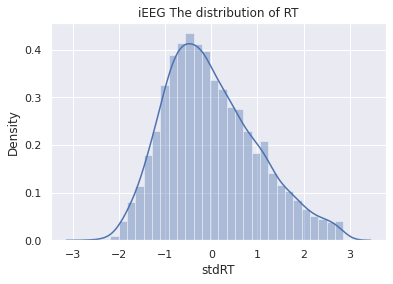

In [72]:
sns.distplot(ieeg_data.stdRT)
pl.title('iEEG The distribution of RT');

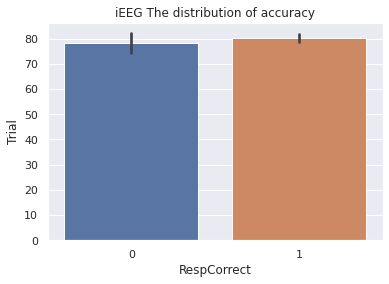

In [73]:
sns.barplot(
    x = 'RespCorrect', y = 'Trial',
    data = ieeg_data
    )
pl.title('iEEG The distribution of accuracy');

**Models**

In [75]:
model_4i = Lmer(
    'RespCorrect ~ Lex + Phono + Length + ProbeType + Lex*Phono + Lex*Length + Phono*Length + ProbeType*Lex + ProbeType*Phono + ProbeType*Length + Lex*Phono*Length + Lex*Phono*ProbeType + Phono*Length*ProbeType + Lex*Length*ProbeType + Lex*Phono*Length*ProbeType + (1|Subject)', 
    data=ieeg_data
    )
model_4i.fit()

Formula: RespCorrect~Lex+Phono+Length+ProbeType+Lex*Phono+Lex*Length+Phono*Length+ProbeType*Lex+ProbeType*Phono+ProbeType*Length+Lex*Phono*Length+Lex*Phono*ProbeType+Phono*Length*ProbeType+Lex*Length*ProbeType+Lex*Phono*Length*ProbeType+(1|Subject)

Family: gaussian	 Inference: parametric

Number of observations: 3343	 Groups: {'Subject': 22.0}

Log-likelihood: -1161.270 	 AIC: 2322.539

Random effects:

                 Name    Var    Std
Subject   (Intercept)  0.001  0.034
Residual               0.113  0.336

No random effect correlations specified

Fixed effects:



,Estimate,2.5_ci,97.5_ci,SE,DF,T-stat,P-val,Sig
(Intercept),0.864,0.645,1.083,0.112,3325.199,7.729,0.000,***
Lex,0.172,-0.132,0.476,0.155,3315.976,1.109,0.267,
Phono,0.054,-0.246,0.353,0.153,3319.287,0.351,0.725,
Length,-0.014,-0.048,0.019,0.017,3310.402,-0.824,0.410,
ProbeType,0.142,0.002,0.282,0.071,3311.578,1.987,0.047,*
Lex:Phono,-0.138,-0.552,0.277,0.212,3325.205,-0.650,0.516,
Lex:Length,-0.004,-0.050,0.043,0.024,3315.508,-0.160,0.873,
Phono:Length,-0.022,-0.069,0.024,0.024,3317.296,-0.945,0.345,
Lex:ProbeType,-0.124,-0.318,0.070,0.099,3317.569,-1.252,0.211,
Phono:ProbeType,-0.071,-0.259,0.116,0.096,3317.572,-0.748,0.455,


In [105]:
model_3i = Lmer(
    'RespCorrect ~ Lex + Length + ProbeType + (1|Subject)', 
    data=ieeg_data
)
model_3i.fit()

Formula: RespCorrect~Lex+Length+ProbeType+(1|Subject)

Family: gaussian	 Inference: parametric

Number of observations: 3343	 Groups: {'Subject': 22.0}

Log-likelihood: -1135.452 	 AIC: 2270.905

Random effects:

                 Name    Var    Std
Subject   (Intercept)  0.001  0.034
Residual               0.114  0.337

No random effect correlations specified

Fixed effects:



,Estimate,2.5_ci,97.5_ci,SE,DF,T-stat,P-val,Sig
(Intercept),0.997,0.946,1.049,0.026,1003.160,37.885,0.000,***
Lex,0.016,-0.007,0.039,0.012,3318.745,1.365,0.172,
Length,-0.031,-0.036,-0.026,0.003,3319.158,-11.929,0.000,***
ProbeType,0.029,0.006,0.052,0.012,3331.108,2.443,0.015,*


In [94]:
model_3ii = Lmer(
    'RespCorrect ~ Lex + Length + Phono + Lex*Length + Phono*Lex + Phono*Length + Lex*Length*Phono + (1|Subject)', 
    data=ieeg_data
)
model_3ii.fit()

Formula: RespCorrect~Lex+Length+Phono+Lex*Length+Phono*Lex+Phono*Length+Lex*Length*Phono+(1|Subject)

Family: gaussian	 Inference: parametric

Number of observations: 3343	 Groups: {'Subject': 22.0}

Log-likelihood: -1151.512 	 AIC: 2303.023

Random effects:

                 Name    Var    Std
Subject   (Intercept)  0.001  0.035
Residual               0.114  0.338

No random effect correlations specified

Fixed effects:



,Estimate,2.5_ci,97.5_ci,SE,DF,T-stat,P-val,Sig
(Intercept),1.075,1.003,1.146,0.037,2115.235,29.427,0.000,***
Lex,-0.019,-0.116,0.079,0.050,3315.848,-0.375,0.708,
Length,-0.036,-0.047,-0.025,0.006,3316.597,-6.539,0.000,***
Phono,-0.047,-0.140,0.047,0.048,3319.285,-0.983,0.326,
Lex:Length,0.002,-0.013,0.017,0.008,3315.089,0.322,0.747,
Lex:Phono,0.030,-0.102,0.161,0.067,3316.658,0.439,0.661,
Length:Phono,0.007,-0.008,0.021,0.007,3318.223,0.879,0.379,
Lex:Length:Phono,0.000,-0.020,0.021,0.010,3315.433,0.034,0.973,


In [93]:
model_pos = Lmer(
    'RespCorrect ~ Lex + Position + Length + Length*Lex + Lex*Position + Position*Length + Lex*Position*Length + (1|Subject)',
    data = ieeg_data
)
model_pos.fit()

Formula: RespCorrect~Lex+Position+Length+Length*Lex+Lex*Position+Position*Length+Lex*Position*Length+(1|Subject)

Family: gaussian	 Inference: parametric

Number of observations: 3343	 Groups: {'Subject': 22.0}

Log-likelihood: -1136.089 	 AIC: 2272.177

Random effects:

                 Name    Var    Std
Subject   (Intercept)  0.001  0.034
Residual               0.113  0.336

No random effect correlations specified

Fixed effects:



,Estimate,2.5_ci,97.5_ci,SE,DF,T-stat,P-val,Sig
(Intercept),1.026,0.962,1.090,0.033,1753.567,31.433,0.000,***
Lex,0.013,-0.072,0.098,0.043,3316.050,0.301,0.763,
Position,0.018,-0.021,0.057,0.020,3315.590,0.901,0.368,
Length,-0.036,-0.046,-0.026,0.005,3315.209,-7.280,0.000,***
Lex:Length,0.006,-0.007,0.019,0.007,3315.467,0.882,0.378,
Lex:Position,-0.009,-0.064,0.046,0.028,3316.505,-0.321,0.748,
Position:Length,0.004,-0.002,0.010,0.003,3316.099,1.302,0.193,
Lex:Position:Length,-0.004,-0.013,0.005,0.005,3315.610,-0.817,0.414,


In [109]:
model_pos = Lmer(
    'RespCorrect ~ Lex + Length + Lex*Length + (1|Subject)',
    data = ieeg_data
)
model_pos.fit()

Formula: RespCorrect~Lex+Length+Lex*Length+(1|Subject)

Family: gaussian	 Inference: parametric

Number of observations: 3343	 Groups: {'Subject': 22.0}

Log-likelihood: -1139.151 	 AIC: 2278.303

Random effects:

                 Name    Var    Std
Subject   (Intercept)  0.001  0.034
Residual               0.114  0.338

No random effect correlations specified

Fixed effects:



,Estimate,2.5_ci,97.5_ci,SE,DF,T-stat,P-val,Sig
(Intercept),1.048,1.000,1.097,0.025,841.105,42.349,0.000,***
Lex,-0.000,-0.066,0.065,0.033,3318.940,-0.005,0.996,
Length,-0.032,-0.040,-0.025,0.004,3319.136,-8.771,0.000,***
Lex:Length,0.002,-0.008,0.013,0.005,3318.870,0.434,0.664,


**Model with Match vs. Mismatch**

In [78]:
match_i = ieeg_data[ieeg_data['ProbeType'] == 2]
mismatch_i = ieeg_data[ieeg_data['ProbeType'] == 1]

In [80]:
# model for MATCH
model_matchi = Lmer(
    'RespCorrect ~ Lex + Phono + Length + Lex*Phono + Lex*Length + Phono*Length + Lex*Phono*Length + (1|Subject)',
    data = match_i
)
model_matchi.fit()

Formula: RespCorrect~Lex+Phono+Length+Lex*Phono+Lex*Length+Phono*Length+Lex*Phono*Length+(1|Subject)

Family: gaussian	 Inference: parametric

Number of observations: 1575	 Groups: {'Subject': 22.0}

Log-likelihood: -442.880 	 AIC: 885.761

Random effects:

                 Name    Var    Std
Subject   (Intercept)  0.005  0.068
Residual               0.098  0.312

No random effect correlations specified

Fixed effects:



,Estimate,2.5_ci,97.5_ci,SE,DF,T-stat,P-val,Sig
(Intercept),1.145,1.047,1.243,0.050,917.447,22.935,0.000,***
Lex,-0.056,-0.186,0.074,0.066,1551.072,-0.848,0.396,
Phono,-0.080,-0.201,0.040,0.062,1547.936,-1.303,0.193,
Length,-0.044,-0.058,-0.029,0.007,1546.379,-5.938,0.000,***
Lex:Phono,0.049,-0.132,0.229,0.092,1557.925,0.527,0.598,
Lex:Length,-0.000,-0.021,0.020,0.010,1550.400,-0.037,0.970,
Phono:Length,0.016,-0.003,0.035,0.010,1546.957,1.683,0.093,.
Lex:Phono:Length,-0.002,-0.030,0.026,0.014,1554.549,-0.137,0.891,


In [81]:
# model for MISMATCH
model_mismatchi = Lmer(
    'RespCorrect ~ Lex + Phono + Length + Lex*Phono + Lex*Length + Phono*Length + Lex*Phono*Length + (1|Subject)',
    data = mismatch_i
)
model_mismatchi.fit()

Formula: RespCorrect~Lex+Phono+Length+Lex*Phono+Lex*Length+Phono*Length+Lex*Phono*Length+(1|Subject)

Family: gaussian	 Inference: parametric

Number of observations: 1768	 Groups: {'Subject': 22.0}

Log-likelihood: -690.641 	 AIC: 1381.281

Random effects:

                 Name    Var    Std
Subject   (Intercept)  0.003  0.050
Residual               0.123  0.351

No random effect correlations specified

Fixed effects:



,Estimate,2.5_ci,97.5_ci,SE,DF,T-stat,P-val,Sig
(Intercept),0.998,0.894,1.101,0.053,1373.595,18.932,0.000,***
Lex,0.059,-0.082,0.200,0.072,1744.219,0.823,0.410,
Phono,-0.000,-0.141,0.140,0.072,1752.019,-0.006,0.995,
Length,-0.028,-0.043,-0.012,0.008,1743.511,-3.518,0.000,***
Lex:Phono,-0.046,-0.237,0.145,0.097,1750.809,-0.473,0.636,
Lex:Length,-0.002,-0.024,0.019,0.011,1743.642,-0.208,0.835,
Phono:Length,-0.005,-0.027,0.016,0.011,1750.360,-0.492,0.623,
Lex:Phono:Length,0.013,-0.017,0.042,0.015,1748.157,0.837,0.402,


**Model with Words vs. Non-words**

In [95]:
words_i = ieeg_data[ieeg_data['Lex'] == 1]
nonwords_i = ieeg_data[ieeg_data['Lex'] == 0]

In [106]:
model_wordsi = Lmer(
    'RespCorrect ~ Phono + ProbeType + Length + (1|Subject)',
    data = words_i
)
model_wordsi.fit()

Formula: RespCorrect~Phono+ProbeType+Length+(1|Subject)

Family: gaussian	 Inference: parametric

Number of observations: 1675	 Groups: {'Subject': 22.0}

Log-likelihood: -536.078 	 AIC: 1072.155

Random effects:

                 Name    Var    Std
Subject   (Intercept)  0.003  0.052
Residual               0.108  0.328

No random effect correlations specified

Fixed effects:



,Estimate,2.5_ci,97.5_ci,SE,DF,T-stat,P-val,Sig
(Intercept),1.069,0.998,1.139,0.036,678.244,29.560,0.00,***
Phono,0.024,-0.008,0.055,0.016,1652.374,1.478,0.14,
ProbeType,-0.023,-0.055,0.009,0.016,1667.116,-1.407,0.16,
Length,-0.030,-0.037,-0.023,0.004,1650.681,-8.382,0.00,***


In [98]:
model_wordsi = Lmer(
    'RespCorrect ~ ProbeType + Length + Length*ProbeType + (1|Subject)',
    data = words_i
)
model_wordsi.fit()

Formula: RespCorrect~ProbeType+Length+Length*ProbeType+(1|Subject)

Family: gaussian	 Inference: parametric

Number of observations: 1675	 Groups: {'Subject': 22.0}

Log-likelihood: -537.018 	 AIC: 1074.035

Random effects:

                 Name    Var    Std
Subject   (Intercept)  0.003  0.052
Residual               0.108  0.328

No random effect correlations specified

Fixed effects:



,Estimate,2.5_ci,97.5_ci,SE,DF,T-stat,P-val,Sig
(Intercept),0.998,0.858,1.137,0.071,1588.022,14.025,0.000,***
ProbeType,0.036,-0.055,0.128,0.047,1652.962,0.776,0.438,
Length,-0.016,-0.038,0.005,0.011,1653.812,-1.460,0.144,
ProbeType:Length,-0.010,-0.024,0.004,0.007,1654.070,-1.374,0.170,


In [107]:
model_nonwordsi = Lmer(
    'RespCorrect ~ Phono + ProbeType + Length + (1|Subject)',
    data = nonwords_i
)
model_nonwordsi.fit()

Formula: RespCorrect~Phono+ProbeType+Length+(1|Subject)

Family: gaussian	 Inference: parametric

Number of observations: 1668	 Groups: {'Subject': 22.0}

Log-likelihood: -598.277 	 AIC: 1196.553

Random effects:

                 Name    Var    Std
Subject   (Intercept)  0.001  0.034
Residual               0.117  0.343

No random effect correlations specified

Fixed effects:



,Estimate,2.5_ci,97.5_ci,SE,DF,T-stat,P-val,Sig
(Intercept),0.937,0.865,1.010,0.037,1113.236,25.316,0.000,***
Phono,-0.013,-0.046,0.020,0.017,1662.917,-0.766,0.444,
ProbeType,0.077,0.044,0.110,0.017,1647.180,4.597,0.000,***
Length,-0.032,-0.040,-0.025,0.004,1644.197,-8.590,0.000,***


**Model with H vs. L**

In [101]:
high_i = ieeg_data[ieeg_data['Phono'] == 0]
low_i = ieeg_data[ieeg_data['Phono'] == 1]

In [102]:
model_highi = Lmer(
    'RespCorrect ~ Lex + ProbeType + Length + Lex*ProbeType + Length*ProbeType + Length*Lex + Length*Lex*ProbeType + (1|Subject)',
    data = high_i
)
model_highi.fit()

Formula: RespCorrect~Lex+ProbeType+Length+Lex*ProbeType+Length*ProbeType+Length*Lex+Length*Lex*ProbeType+(1|Subject)

Family: gaussian	 Inference: parametric

Number of observations: 1545	 Groups: {'Subject': 22.0}

Log-likelihood: -562.410 	 AIC: 1124.820

Random effects:

                 Name    Var    Std
Subject   (Intercept)  0.002  0.043
Residual               0.116  0.341

No random effect correlations specified

Fixed effects:



,Estimate,2.5_ci,97.5_ci,SE,DF,T-stat,P-val,Sig
(Intercept),0.866,0.644,1.089,0.114,1536.739,7.632,0.000,***
Lex,0.167,-0.141,0.476,0.158,1527.161,1.063,0.288,
ProbeType,0.141,-0.001,0.282,0.072,1521.881,1.942,0.052,.
Length,-0.014,-0.048,0.020,0.017,1520.551,-0.827,0.408,
Lex:ProbeType,-0.121,-0.318,0.076,0.101,1528.978,-1.204,0.229,
ProbeType:Length,-0.015,-0.036,0.007,0.011,1519.204,-1.309,0.191,
Lex:Length,-0.003,-0.051,0.044,0.024,1526.797,-0.137,0.891,
Lex:ProbeType:Length,0.003,-0.028,0.033,0.016,1528.330,0.179,0.858,


In [103]:
model_lowi = Lmer(
    'RespCorrect ~ Lex + ProbeType + Length + Lex*ProbeType + Length*ProbeType + Length*Lex + Length*Lex*ProbeType + (1|Subject)',
    data = low_i
)
model_lowi.fit()

Formula: RespCorrect~Lex+ProbeType+Length+Lex*ProbeType+Length*ProbeType+Length*Lex+Length*Lex*ProbeType+(1|Subject)

Family: gaussian	 Inference: parametric

Number of observations: 1798	 Groups: {'Subject': 22.0}

Log-likelihood: -600.396 	 AIC: 1200.791

Random effects:

                 Name    Var    Std
Subject   (Intercept)  0.001  0.024
Residual               0.111  0.333

No random effect correlations specified

Fixed effects:



,Estimate,2.5_ci,97.5_ci,SE,DF,T-stat,P-val,Sig
(Intercept),0.926,0.724,1.128,0.103,1789.480,8.987,0.000,***
Lex,0.020,-0.258,0.297,0.142,1789.923,0.139,0.890,
ProbeType,0.065,-0.057,0.188,0.063,1783.102,1.044,0.297,
Length,-0.038,-0.070,-0.006,0.016,1784.013,-2.335,0.020,*
Lex:ProbeType,0.003,-0.178,0.183,0.092,1789.652,0.029,0.977,
ProbeType:Length,0.005,-0.014,0.025,0.010,1782.905,0.554,0.580,
Lex:Length,0.025,-0.019,0.069,0.022,1786.272,1.112,0.266,
Lex:ProbeType:Length,-0.016,-0.044,0.013,0.014,1787.854,-1.078,0.281,


#iEEG + new subj

Converting new subject to the DF format

In [124]:
def get_to_df(data):
  # this function reads into .mat file and creates df out of it for all of the trials of one subject
  # i'm planning on making it more beautiful later

  columns = data[0][1].dtype.names
  df = pd.DataFrame(columns=columns)
  df['Trial'] = np.nan
  df_ = df.copy()
  for i in range(0, data.shape[1]): # for each trial number
    mdtype = data[0][i].dtype
    values = []
    for name in mdtype.names:
      values.append(data[0][i][name])
    values = extra_arrays(values)
    values.append(str(i)) # adding a trial number at the end
    df_.loc[len(df_.index)] = values
  return df_

In [125]:
def extra_arrays(x):
  # elements have nested structure, i.e. arrays inside the arrays
  # below we're getting rid of this depending on the shape of values

  values = []
  for elem in range(0, len(x)):
    var = x[elem]
    var = var[0, 0]
    if var.shape == (1, 1):
      var = var[0, 0]
      values.append(var)
    elif var.shape == (1,):
      values.append(var[0])
    elif var.shape == (1, 5):
      var = var.tolist()[0]
      values.append(var)
    elif var.shape == (5, 1):
      new = []
      for i in var:
        i = i[0]
        new.append(i)
      values.append(new)
    else:
      values.append(var)
  return values

In [135]:
subj_df = get_to_df(new_subject['trialInfo'])
subj_df['Subject'] = 'D72'

,block,ProbeType,ProbeTypeName,StimlusCategory,ReactionTime,KeyCode,Resp,RespCorrect,Omission,stimulusAudioStart,...,stimulusSounds_idx,stimulusSounds_name,ProbeCategory,probeSound_idx,probeSound_name,ListenCueTime,MaintenancePeriodTime,ProbeCueTime,Trial,Subject
0,1,2,in_sequence,Low Words,0.980332,114,Yes,1,Responded,"[1655142722.492162, 1655142723.4921749, 165514...",...,"[29, 28, 23, 21, 27]","[[wash.wav], [waif.wav], [long.wav], [fog.wav]...",Low Words,21,fog.wav,1.655143e+09,1.655143e+09,1.655143e+09,0,D72
1,1,2,in_sequence,Low Non-words,1.049221,114,Yes,1,Responded,"[1655142734.025563, 1655142735.0255728, 165514...",...,"[32, 36, 33, 39, 37]","[[faez.wav], [vern.wav], [gawth.wav], [yuwf.wa...",Low Non-words,37,wehz.wav,1.655143e+09,1.655143e+09,1.655143e+09,1,D72
2,1,1,out_of_sequence,Low Non-words,1.137725,115,No,1,Responded,"[[1655142745.492291], [1655142746.4922953], [1...",...,"[[33, 39, 37, 35, 34, 32, 36]]","[[[gawth.wav]], [[yuwf.wav]], [[wehz.wav]], [[...",High Non-Words,17,puwn.wav,1.655143e+09,1.655143e+09,1.655143e+09,2,D72
3,1,2,in_sequence,Low Words,1.939876,115,No,0,Responded,"[[1655142759.042354], [1655142760.0423598], [1...",...,"[[28, 27, 22, 24, 26, 23, 29, 25, 21]]","[[[waif.wav]], [[tube.wav]], [[fudge.wav]], [[...",Low Words,24,noun.wav,1.655143e+09,1.655143e+09,1.655143e+09,3,D72
4,1,1,out_of_sequence,High Non-Words,1.054473,114,Yes,0,Responded,"[[1655142775.4257715], [1655142776.4257874], [...",...,"[[12, 19, 13, 15, 18, 20, 17, 11, 16]]","[[[gaen.wav]], [[rihn.wav]], [[kawl.wav]], [[k...",Low Non-Words,33,gawth.wav,1.655143e+09,1.655143e+09,1.655143e+09,4,D72


In [138]:
subj_df.columns

Index(['block', 'ProbeType', 'ProbeTypeName', 'StimlusCategory',
       'ReactionTime', 'KeyCode', 'Resp', 'RespCorrect', 'Omission',
       'stimulusAudioStart', 'stimulusAlignedTrigger', 'probeAudioStart',
       'probeAlignedTrigger', 'TriggerValue', 'stimulusSounds_idx',
       'stimulusSounds_name', 'ProbeCategory', 'probeSound_idx',
       'probeSound_name', 'ListenCueTime', 'MaintenancePeriodTime',
       'ProbeCueTime', 'Trial', 'Subject'],
      dtype='object')

In [141]:
# no response 
new_s = subj_df[subj_df['Resp'] != 'No Response']
new_s = new_s[[
               'block', 
]]